In [2]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
# pyfolio  qgrid empyrical
import pickle
import numpy as np
import time

import seaborn as sns
from itertools import combinations
import multiprocessing as mp
from tqdm import tqdm
import sys
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [3]:
import os
current_path = os.getcwd()

In [4]:
sys.path.append('C:\\Users\\Rafael\\Trading\\Trading')

In [5]:
import TradingModule as td

In [761]:
with open('C:\\Users\\Rafael\\Trading\\Trading\\ibov.pkl','rb') as file:
     data =pickle.load(file)
data1 =data['Adj Close']
data1.drop('MGLU3.SA',axis=1,inplace=True)

C:\Users\Rafael\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:

import TradingRefact as td 


In [107]:

test=[td.calculate_returns(td.troca_posicao(td.estrategia_mmovel(data1[x]))) for  x in  data1.columns ]

In [119]:
retornos =pd.concat([i['DAILY_CHANGE']  for i  in test],axis=1)

In [129]:
td.calculate_returns(td.troca_posicao(td.estrategia_mmovel(data1['ABEV3.SA']))).dropna(subset=['DAILY_CHANGE'])

,ABEV3.SA,roll,DECISAO,DECISAO_1,ESTRAT,DAILY_CHANGE
Date,,,,,,
2015-01-07,14.198765,0.000405,1.0,-1.0,1.0,1.000000
2015-01-08,14.264312,0.010212,1.0,1.0,NaN,1.004616
2015-01-09,14.229815,0.035279,1.0,1.0,NaN,0.997582
2015-01-12,14.410921,0.045102,1.0,1.0,NaN,1.012727
2015-01-13,14.410921,0.081183,1.0,1.0,NaN,1.000000
...,...,...,...,...,...,...
2019-10-16,18.406565,0.000537,1.0,1.0,NaN,1.000000
2019-10-17,18.289637,0.005727,1.0,1.0,NaN,0.993647
2019-12-18,18.601448,0.009347,1.0,-1.0,1.0,1.000000


In [493]:
%%timeit
x=td.estrategia_mmovel(data1['ABEV3.SA'])


7.46 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [483]:

x=td.estrategia_mmovel(data1['ABEV3.SA'])

In [485]:
x

,ABEV3.SA,roll,DECISAO
Date,,,
2014-12-30,13.855803,0.000000,1.0
2015-01-02,13.735766,0.000000,1.0
2015-01-05,13.487113,-0.015687,1.0
2015-01-06,14.001563,-0.013227,1.0
2015-01-07,14.198765,0.000405,0.0
...,...,...,...
2019-12-16,18.591703,-0.193529,1.0
2019-12-17,18.426054,-0.077972,1.0
2019-12-18,18.601448,0.009347,0.0


In [489]:

y=td.troca_posicao(x)

In [491]:


z=td.calculate_returns(y)

In [492]:
%%timeit
w=td.stop_loss(z,0.95)

6.57 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


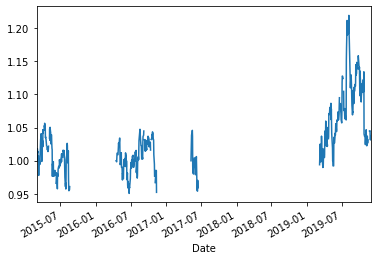

In [505]:
kt['OP_RESULT'].plot()

In [968]:
params =np.array_split([i for i in combinations(range(10,250,10),2)], mp.cpu_count() - 1)
if __name__ == '__main__':
    pool = mp.Pool(processes = (mp.cpu_count()-1))
    results = pool.map(td.worker, params)
    
    pool.close()
    pool.join()

In [969]:
results= [pd.concat(i,axis=1) for i in results]

In [970]:
c 

In [971]:
results.columns=pd.MultiIndex.from_tuples([i for i in combinations(range(10,250,10),2)])

In [985]:
data1['^BVSP']

Date
2010-01-26     65524.0
2010-01-27     65070.0
2010-01-28     65588.0
2010-01-29     65402.0
2010-02-01     66572.0
                ...   
2020-01-20    118862.0
2020-01-21    117026.0
2020-01-22    118391.0
2020-01-23    119528.0
2020-01-24    118376.0
Name: ^BVSP, Length: 2609, dtype: float64

In [986]:
dic={}
for i in [i for i in combinations(range(10,250,10),2)]:
    ret=(results[(i[0] ,i[1])]/results[(i[0] ,i[1])].shift(1))
    rf=(data1['^BVSP'][data1.index<='2019-01-01']/data1['^BVSP'][data1.index<='2019-01-01'].shift(1))
    excess_ret=(ret-rf).rolling(252,min_periods=100).mean()
    std_ret=(ret-rf).rolling(252,min_periods=100).std()
    dic[i]=(excess_ret/std_ret)*np.sqrt(252)

In [987]:
dic[(10,20)].dropna()

Date
2010-07-13    1.479868
2010-07-14    1.242051
2010-07-15    1.220039
2010-07-16    1.204431
2010-07-19    0.985406
                ...   
2018-12-26   -1.956467
2018-12-27   -2.077007
2018-12-28   -2.351506
2018-12-31   -2.241101
2019-01-01   -2.225853
Length: 2211, dtype: float64

In [988]:
heat=pd.DataFrame(dic).iloc[-1].reset_index()

10   20    -2.225853
     30    -2.551258
     40    -2.006883
     50    -1.801252
     60    -1.351957
              ...   
210  230    1.419142
     240    2.060403
220  230    1.873435
     240    0.283199
230  240    0.713456
Name: 2019-01-01 00:00:00, Length: 276, dtype: float64

In [998]:
idxmax()

(190, 200)

In [1014]:
results.iloc[-1].sort_values()

10   20      0.357958
     30      0.765254
     80      0.775797
     60      0.795828
     40      0.821227
              ...    
80   200    14.031701
100  110    14.438650
90   240    14.526135
220  230    15.243111
190  200    23.924061
Name: 2019-01-01 00:00:00, Length: 276, dtype: float64

In [1008]:
heat2.sort_values(by=3)

,1,2,3
1,10,30,-2.551258
0,10,20,-2.225853
2,10,40,-2.006883
7,10,90,-1.887041
6,10,80,-1.826480
...,...,...,...
223,140,170,2.294837
167,90,210,2.355530
184,100,240,2.370438
166,90,200,2.414900


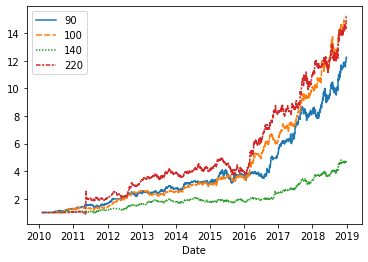

In [1030]:
sns.lineplot(data=results[[(90,200),(220,230),(140,170),(100,110)]])

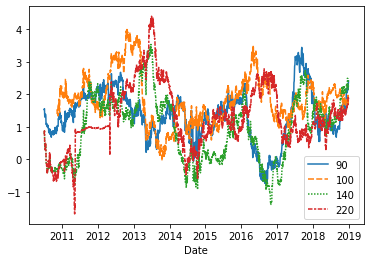

In [1028]:
sns.lineplot(data=pd.DataFrame(dic)[[(90,200),(220,230),(140,170),(100,110)]])

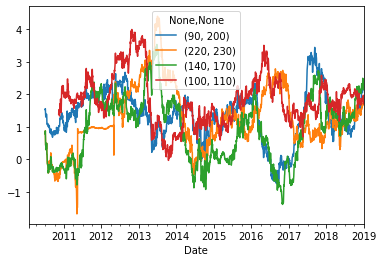

In [1025]:
pd.DataFrame(dic)[[(90,200),(220,230),(140,170),(100,110)]].plot()

In [1044]:
t=td.worker([(100,110)])

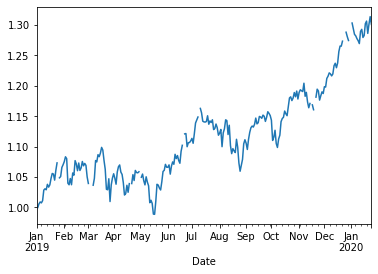

In [1052]:
(data1['^BVSP'] [ data1.index>='2019-01-01']/data1.loc['2019-01-02','^BVSP']).plot()

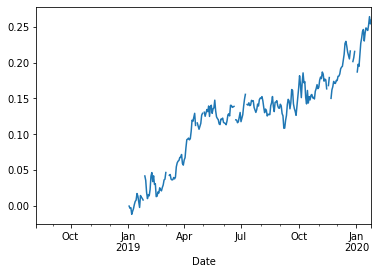

In [1054]:
(t[0]-(data1['^BVSP'] [ data1.index>='2019-01-01']/data1.loc['2019-01-02','^BVSP'])).plot()

In [1057]:
dic={}
#for i in [i for i in combinations(range(10,250,10),2)]:
ret=t[0]/t[0].shift(1)
rf=(data1['^BVSP'][data1.index>='2019-01-01']/data1['^BVSP'][data1.index>='2019-01-01'].shift(1))
excess_ret=(ret-rf).rolling(252,min_periods=100).mean()
std_ret=(ret-rf).rolling(252,min_periods=100).std()
dic[i]=(excess_ret/std_ret)*np.sqrt(252)

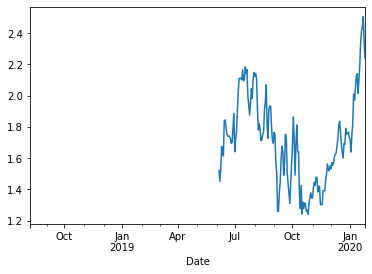

In [1062]:
dic[(230, 240)].plot()

In [1065]:
k=[td.stop_loss(td.calculate_returns(td.troca_posicao(td.estrategia_mmovel(data1[x],110,100))),0.95) for  x in  data1.columns ]

In [1072]:
kk=pd.concat([i for i in k  if  len(i)!=0],axis=1)

In [1095]:
cols= n.columns[kk['DECISAO'].loc['2020-01-01']==0]

In [1096]:
cols

Index(['BBDC3.SA', 'BRAP4.SA', 'BRL=X', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA',
       'CIEL3.SA', 'CSAN3.SA', 'CYRE3.SA', 'EQTL3.SA', 'FLRY3.SA', 'GGBR4.SA',
       'GOAU4.SA', 'HYPE3.SA', 'LAME4.SA', 'LREN3.SA', 'MULT3.SA', 'NATU3.SA',
       'PETR3.SA', 'RADL3.SA', 'RENT3.SA', 'SPY', 'TIMP3.SA', 'VALE3.SA',
       'YDUQ3.SA', '^BVSP', '^N225'],
      dtype='object')

In [1097]:
n=kk[kk.columns[::8]]

In [1106]:
pesos=pd.notnull(rets).sum(axis=1)

In [1110]:
pesos


Date
2020-01-01     0
2020-01-02     1
2020-01-03    25
2020-01-06    25
2020-01-07    26
2020-01-08    26
2020-01-09    25
2020-01-10    25
2020-01-13    24
2020-01-14    24
2020-01-15    24
2020-01-16    24
2020-01-17    23
2020-01-20    22
2020-01-21     1
2020-01-22     1
2020-01-23     1
2020-01-24     1
dtype: int64

In [1118]:
rets=(n[cols][n.index>='2020-01-01']/n[cols][n.index>='2020-01-01'].shift(1))

In [1121]:
(rets.sum(axis=1)/pesos)

Date
2020-01-01         NaN
2020-01-02    0.999878
2020-01-03    1.002464
2020-01-06    0.996993
2020-01-07    1.000385
2020-01-08    0.994804
2020-01-09    1.002558
2020-01-10    1.000939
2020-01-13    1.018548
2020-01-14    1.008197
2020-01-15    0.993161
2020-01-16    1.004520
2020-01-17    1.014580
2020-01-20    1.014452
2020-01-21    0.989808
2020-01-22    0.990868
2020-01-23    1.019412
2020-01-24    1.000769
dtype: float64

In [1122]:
rets

,BBDC3.SA,BRAP4.SA,BRL=X,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CSAN3.SA,CYRE3.SA,EQTL3.SA,...,NATU3.SA,PETR3.SA,RADL3.SA,RENT3.SA,SPY,TIMP3.SA,VALE3.SA,YDUQ3.SA,^BVSP,^N225
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,0.999878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.997632,1.011805,1.001768,1.030991,1.000000,0.991034,1.010753,1.015419,1.068404,1.006053,...,NaN,0.983098,0.985776,1.000409,0.992428,0.999368,0.997595,0.964391,0.992696,NaN
2020-01-06,0.994264,1.004667,1.008351,0.993022,0.993779,0.974454,0.975177,0.994118,0.990854,1.001289,...,NaN,1.032510,0.980315,0.988344,1.003815,0.998734,0.994066,1.019227,0.992957,NaN
2020-01-07,0.982983,1.004387,1.000838,1.016216,0.997496,1.022392,0.970909,1.018027,1.003077,0.994850,...,NaN,0.986376,0.986280,1.009725,0.997188,1.010773,1.007275,0.981350,0.998152,1.015982
2020-01-08,0.984742,0.999743,1.001428,0.970745,1.013335,0.993056,0.977528,0.983509,0.969018,1.006902,...,NaN,0.983732,1.013358,0.995082,1.005330,1.010658,1.000185,0.994102,0.996443,0.984265
2020-01-09,NaN,0.987150,0.999164,1.014247,1.053414,0.975793,0.938697,0.989280,0.994935,1.011997,...,NaN,1.005616,1.030091,1.005354,1.006781,0.986352,0.986854,1.008789,0.997419,1.023060
2020-01-10,NaN,0.996876,1.007212,1.007023,0.981481,1.001654,1.006803,1.014865,1.007000,1.011854,...,NaN,0.995966,0.969023,0.980131,0.997122,1.026415,1.001126,1.004356,0.996171,1.004663
2020-01-13,NaN,1.042048,0.994721,1.021459,1.035789,1.007155,1.004054,1.025599,1.018957,0.999582,...,NaN,0.999689,1.023406,1.003135,1.006877,1.000613,1.036357,1.034483,1.015774,NaN


In [1120]:
(rets.sum(axis=1)/pesos).cumprod()

Date
2020-01-01         NaN
2020-01-02    0.999878
2020-01-03    1.002342
2020-01-06    0.999328
2020-01-07    0.999712
2020-01-08    0.994518
2020-01-09    0.997062
2020-01-10    0.997999
2020-01-13    1.016510
2020-01-14    1.024842
2020-01-15    1.017833
2020-01-16    1.022434
2020-01-17    1.037341
2020-01-20    1.052333
2020-01-21    1.041607
2020-01-22    1.032095
2020-01-23    1.052130
2020-01-24    1.052940
dtype: float64

In [992]:
heat=results.iloc[-1].reset_index()

In [993]:
heat.columns=[1,2,3]

In [994]:
heat[heat[1]>30]

,1,2,3
66,40,50,3.218261
67,40,60,5.253050
68,40,70,4.728514
69,40,80,9.382848
70,40,90,6.281542
...,...,...,...
271,210,230,5.471680
272,210,240,8.545011
273,220,230,15.243111
274,220,240,8.193899


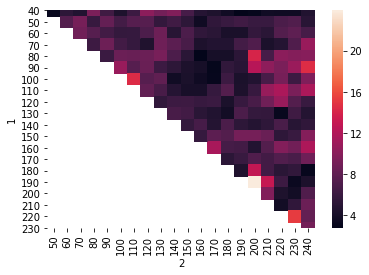

In [995]:
sns.heatmap(heat[heat[1]>30].pivot(1,2,3))

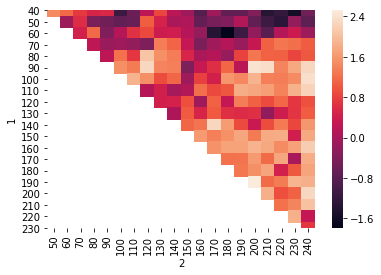

In [999]:
heat2=pd.DataFrame(dic).iloc[-1].reset_index()
heat2.columns=[1,2,3]
sns.heatmap(heat2[heat2[1]>30].pivot(1,2,3))

In [6]:
data1.drop('NAN.SA',axis=1,inplace=True)
data1.drop('MGLU3.SA',axis=1,inplace=True)

C:\Users\Rafael\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:

class estrategias:
    decisao_previa =''  
    preco_inicial=0
    resultado_previo=0  
    def estrat_retornos22(self,x):


        if     self.resultado_previo!=0:
            retorno_total=  (x[0]/self.preco_inicial)*self.resultado_previo  
        if  self.preco_inicial!=0:
            retorno_op =  x[0]/self.preco_inicial  



        if x[1]=='COMPRA' and x[1]!=self.decisao_previa  :

            self.preco_inicial=x[0]
            self.decisao_previa='COMPRA'


        elif    x[1]=='COMPRA' and x[1]==self.decisao_previa  :

            if self.resultado_previo!=0:
                return([retorno_op, retorno_total])
            else: 
                return([retorno_op,retorno_op])
        elif x[1]=='VENDA' and self.decisao_previa =='COMPRA':
            self.decisao_previa='VENDA'
            if self.resultado_previo!=0:
                self.resultado_previo=retorno_total
                return([retorno_op, retorno_total])
            else :
                self.resultado_previo = retorno_op
                return([retorno_op,retorno_op])




In [45]:

def worker(self,params):
    lista=[]
    lista2 =[]
    for n in params:
        long=n[0]
        short=n[1]
        for i in self.data1.columns:

            td1 =td.estrategias()
            teste=td1.estrat_mmovel(self.data1[i],long,short)
            td2=td.estrategias()



            teste2=pd.Series([td2.estrat_retornos22((a,b)) for a, b in zip(teste[i], teste['DECISAO'])],index=teste.index ).dropna()
            teste2=pd.DataFrame(teste2.tolist(),index=teste2.index)





            teste2.columns=['RETORNO','RETORNO_TOT']

            teste2= pd.concat([teste,teste2],axis=1)
            lista.append(teste2)
            cols=sorted(data1.columns.to_list()*6)
        y=pd.concat(lista,axis=1)
        y.columns=zip(cols,y)
        y.columns=pd.MultiIndex.from_tuples(y.columns.to_list())
        retorno=(y.xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1)/73)
        lista2.append(retorno)
#teste2 =pd.concat([teste2], keys=[i], names=['ACAO'],axis=1)
    
#y=pd.concat([teste2,y],axis=1)   
#y=y.drop(['DROPAR'],axis=1)   
#y.columns=pd.MultiIndex.from_tuples(y.columns.to_list())
    


In [42]:
print(retorno
     )

Date
2014-12-26    0.986301
2014-12-29    0.986301
2014-12-30    0.986301
2014-12-31    0.986301
2015-01-01    0.986301
                ...   
2019-12-16    1.898031
2019-12-17    1.897895
2019-12-18    1.918335
2019-12-19    1.931198
2019-12-20    1.929348
Length: 1301, dtype: float64


In [11]:
cols=sorted(data1.columns.to_list()*6)

In [12]:
y=pd.concat(lista,axis=1)

In [13]:
y.columns

Index(['ABEV3.SA', 'roll', 'DECISAO', 'ESTRAT', 'RETORNO', 'RETORNO_TOT',
       'AZUL4.SA', 'roll', 'DECISAO', 'ESTRAT',
       ...
       'DECISAO', 'ESTRAT', 'RETORNO', 'RETORNO_TOT', '^N225', 'roll',
       'DECISAO', 'ESTRAT', 'RETORNO', 'RETORNO_TOT'],
      dtype='object', length=438)

In [14]:
y.columns=zip(cols,y)

In [15]:
y.columns=pd.MultiIndex.from_tuples(y.columns.to_list())

In [16]:

for i in data1.columns:
    
    td0=td.estrategias()
    y[(i,'DECISAO')]=pd.Series([td0.stop((a,b),loss=0.95) for a,b in  zip(y[i,'DECISAO'], y[i,'RETORNO'])])

    tds =td.estrategias()

    y[i,'ESTRAT']=y[i,'DECISAO'].apply(tds.estrat)
   

    td2=td.estrategias()
    teste2=pd.Series([td2.estrat_retornos22((a,b)) for a, b in zip(y[i,i], y[i,'DECISAO'])],index=y.index ).dropna()
   
    teste2 =pd.DataFrame(teste2.dropna().tolist(),index=teste2.dropna().index)
  
    
    
    try:
        teste2.columns=['RETORNO','RETORNO_TOT']
    except:
        continue
  
    y[i,'RETORNO']=teste2['RETORNO']


    
    y[i,'RETORNO_TOT']= teste2['RETORNO_TOT']



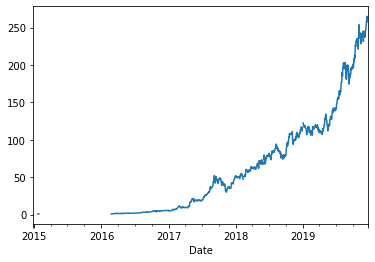

In [19]:
y[('MGLU3.SA','RETORNO')].plot()

In [26]:
y.xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1)[-1]

393.19472540886835

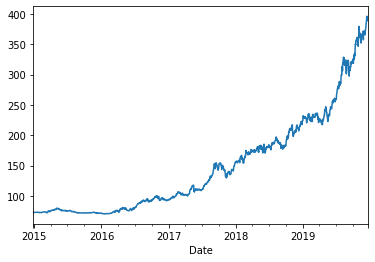

In [21]:
y.xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1).plot()

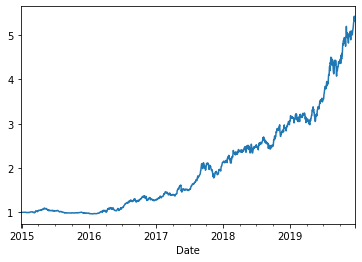

In [22]:
(y.xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1)/73).plot()

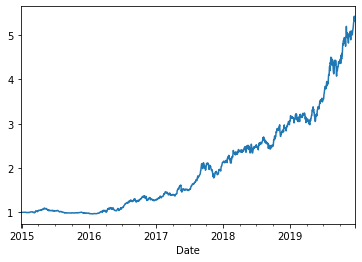

In [23]:
(y.xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1)/73).plot()

In [30]:
retorno=(y.xs('RETORNO_TOT',axis=1,level=1).fillna(method='ffill').fillna(1).sum(axis=1)/73)[-1]

In [31]:
retorno[-1]

1.9293484258254838

In [25]:
((retorno-retorno.shift(-1))/retorno)

Date
2014-12-26    0.000000
2014-12-29    0.000000
2014-12-30    0.000000
2014-12-31    0.000000
2015-01-01    0.000000
                ...   
2019-12-16    0.000072
2019-12-17   -0.010770
2019-12-18   -0.006705
2019-12-19    0.000958
2019-12-20         NaN
Length: 1301, dtype: float64

In [408]:
tds =td.estrategias()

In [409]:
y['ELET6.SA','ESTRAT']=y['ELET6.SA','DECISAO'].apply(tds.estrat)

In [410]:
td2=td.estrategias()
teste2=y['ELET6.SA'].apply(td2.estrat_retornos1,axis=1)

In [411]:
y[('ELET6.SA','RETORNOS')]=teste2

In [412]:
td2=td.estrategias()

In [413]:
y['ELET6.SA'].apply(td2.estrat_retornos,axis=1                   ).dropna()

Date
2015-01-06    1.039795
2015-01-07    1.075738
2015-01-08    1.041078
2015-01-09    0.982028
2015-01-12    0.996149
                ...   
2019-10-04    2.341845
2019-10-07    2.187017
2019-10-08    2.159023
2019-10-09    2.163593
2019-10-10    2.141883
Length: 612, dtype: float64

In [434]:
y['ELET6.SA'].dropna(subset=['ESTRAT'])['RETORNOS'].dropna().product()

2.1418829470376455

In [167]:
y.columns

Index([      ('^N225', '^N225'),        ('^N225', 'roll'),
           ('^N225', 'DECISAO'),      ('^N225', 'ESTRAT'),
             ('^BVSP', '^BVSP'),        ('^BVSP', 'roll'),
           ('^BVSP', 'DECISAO'),      ('^BVSP', 'ESTRAT'),
       ('YDUQ3.SA', 'YDUQ3.SA'),     ('YDUQ3.SA', 'roll'),
       ...
         ('B3SA3.SA', 'ESTRAT'), ('AZUL4.SA', 'AZUL4.SA'),
           ('AZUL4.SA', 'roll'),  ('AZUL4.SA', 'DECISAO'),
         ('AZUL4.SA', 'ESTRAT'), ('ABEV3.SA', 'ABEV3.SA'),
           ('ABEV3.SA', 'roll'),  ('ABEV3.SA', 'DECISAO'),
         ('ABEV3.SA', 'ESTRAT'),                 'DROPAR'],
      dtype='object', length=293)